# Python for Astronomer Crush Course
## 节选自天文数据基础与Python天文技术培训
### In this course you will learn the basic usage of several frequently used packages in the data analysis of astrophysics, i.e. `numpy`, `astropy`, `pandas` etc. The full courses are [here](https://hebl.china-vo.org/course/PIA2020/).
In this section, we will explore some basics of `astropy`.

![National Astronomical Data Center](NADC.png)

# Constants

In [1]:
from astropy import constants as const
import numpy as np

In [2]:
help(const)

Help on package astropy.constants in astropy:

NAME
    astropy.constants

DESCRIPTION
    Contains astronomical and physical constants for use in Astropy or other
    places.
    
    A typical use case might be::
    
        >>> from astropy.constants import c, m_e
        >>> # ... define the mass of something you want the rest energy of as m ...
        >>> m = m_e
        >>> E = m * c**2
        >>> E.to('MeV')  # doctest: +FLOAT_CMP
        <Quantity 0.510998927603161 MeV>
    
    The following constants are available:
    
    ========== ============== ================ =========================
       Name        Value            Unit       Description
    ========== ============== ================ =========================
        G        6.6743e-11     m3 / (kg s2)   Gravitational constant
       N_A     6.02214076e+23    1 / (mol)     Avogadro's number
        R        8.31446262     J / (K mol)    Gas constant
       Ryd       10973731.6       1 / (m)      Rydberg consta

In [3]:
print(const.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


In [4]:
print(const.c.to('km/s'))

299792.458 km / s


# Unit

In [5]:
from astropy import units as u

In [6]:
help(u)

Help on package astropy.units in astropy:

NAME
    astropy.units

DESCRIPTION
    This subpackage contains classes and functions for defining and converting
    between different physical units.
    
    This code is adapted from the `pynbody
    <https://github.com/pynbody/pynbody>`_ units module written by Andrew
    Pontzen, who has granted the Astropy project permission to use the
    code under a BSD license.

PACKAGE CONTENTS
    _typing
    astrophys
    cds
    cgs
    core
    decorators
    deprecated
    equivalencies
    format (package)
    function (package)
    imperial
    misc
    photometric
    physical
    quantity
    quantity_helper (package)
    required_by_vounit
    si
    structured
    tests (package)
    utils

SUBMODULES
    function_units

FUNCTIONS
    __getattr__(attr)

DATA
    A = Unit("A")
    AA = Unit("Angstrom")
    AB = Unit("AB")
    ABflux = Unit("AB")
    ABmag = Unit("mag(AB)")
    AU = Unit("AU")
    Angstrom = Unit("Angstrom")
    B = Unit(

$$F=\frac{3*100* \rm{M_{\odot} (kg)}*G}{2.2 (\rm{au})^2}$$

In [7]:
F = (const.G * 3. * const.M_sun * 100 * u.kg) / (2.2 * u.au) ** 2

In [8]:
print(F.to(u.N))  

0.3675671602160826 N


In [9]:
m = const.m_e
E = m * const.c**2

In [10]:
E

<Quantity 8.18710578e-14 kg m2 / s2>

In [11]:
E.to('MeV')  

<Quantity 0.51099895 MeV>

In [12]:
15.1 * u.meter / (32.0 * u.second)  

<Quantity 0.471875 m / s>

In [13]:
x = 1.0 * u.parsec

In [14]:
x

<Quantity 1. pc>

In [15]:
x.to(u.km) 

<Quantity 3.08567758e+13 km>

In [16]:
ly = 1.0 * u.lyr

In [17]:
ly

<Quantity 1. lyr>

In [18]:
ly.to(u.au)

<Quantity 63241.07708427 AU>

In [19]:
ly.to(u.parsec)

<Quantity 0.30660139 pc>

In [20]:
ly.to(u.km)

<Quantity 9.46073047e+12 km>

In [21]:
yellow = 580 * u.nm

In [22]:
yellow.to(u.terahertz, equivalencies=u.spectral())

<Quantity 516.88354828 THz>

# NDData &  Table

In [23]:
from astropy.nddata import NDData

In [24]:
from astropy.nddata import CCDData

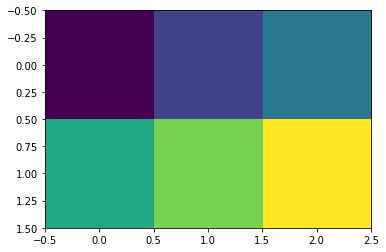

In [25]:
x = CCDData([[1,2,3], [4,5,6]], unit='adu')
np.asarray(x)

from matplotlib import pyplot as plt  

plt.imshow(x)   

In [26]:
from astropy.table import Table

In [27]:
hip = Table.read('data/hip_main.dat',  readme='data/ReadMe',format='ascii.cds')

In [28]:
hip

Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,Plx,pmRA,pmDE,e_RAdeg,e_DEdeg,e_Plx,e_pmRA,e_pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,pmRA:DE,pmRA:Plx,pmDE:RA,pmDE:DE,pmDE:Plx,pmDE:pmRA,F1,F2,---,BTmag,e_BTmag,VTmag,e_VTmag,m_BTmag,B-V,e_B-V,r_B-V,V-I,e_V-I,r_V-I,CombMag,Hpmag,e_Hpmag,Hpscat,o_Hpmag,m_Hpmag,Hpmax,HPmin,Period,HvarType,moreVar,morePhoto,CCDM,n_CCDM,Nsys,Ncomp,MultFlag,Source,Qual,m_HIP,theta,rho,e_rho,dHp,e_dHp,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
,,,,,mag,,,deg,deg,,mas,mas / yr,mas / yr,mas,mas,mas,mas / yr,mas / yr,,,,,,,,,,,%,,,mag,mag,mag,mag,,mag,mag,,mag,mag,,,mag,mag,mag,,,mag,mag,d,,,,,,,,,,,,deg,arcsec,arcsec,mag,mag,,,,,,,,mag,,
str1,int64,str1,str11,str11,float64,int64,str1,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,str1,float64,float64,str1,float64,float64,str1,str1,float64,float64,float64,int64,str1,float64,float64,float64,str1,str1,str1,str10,str1,int64,int64,str1,str1,str1,str2,int64,float64,float64,float64,float64,str1,str1,str1,int64,str10,str10,str10,float64,str12,str1
H,1,--,00 00 00.22,+01 05 20.4,9.1,--,H,0.00091185,1.08901332,--,3.54,-5.2,-1.88,1.32,0.74,1.39,1.36,0.81,0.32,-0.07,-0.11,-0.24,0.09,-0.01,0.1,-0.01,0.01,0.34,0,0.74,1,9.643,0.02,9.13,0.019,--,0.482,0.025,T,0.55,0.03,L,--,9.2043,0.002,0.017,87,--,9.17,9.24,--,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,S,--,--,224700,B+00 5077,--,--,0.66,F5,S
H,2,--,00 00 00.91,-19 29 55.8,9.27,--,G,0.00379737,-19.49883745,+,21.9,181.21,-0.93,1.28,0.7,3.1,1.74,0.92,0.12,-0.14,-0.24,-0.29,0.01,0.21,-0.02,-0.19,-0.28,0.14,2,1.45,2,10.519,0.033,9.378,0.021,--,0.999,0.002,G,1.04,0.0,I,--,9.4017,0.0017,0.015,120,--,9.37,9.44,--,C,--,--,--,--,--,1,O,--,--,--,--,--,--,--,--,--,--,--,224690,B-20 6688,--,--,1.04,K3V,4
H,3,--,00 00 01.20,+38 51 33.4,6.61,--,G,0.00500795,38.85928608,--,2.81,5.24,-2.91,0.53,0.4,0.63,0.57,0.47,0.06,0.09,0.04,0.43,-0.01,-0.06,0.03,0.24,0.07,0.21,0,-0.45,3,6.576,0.004,6.621,0.005,--,-0.019,0.004,G,0.0,0.0,H,--,6.6081,0.0007,0.008,127,--,6.6,6.62,--,C,--,--,00000+3852,I,1,1,--,--,--,--,--,--,--,--,--,S,--,--,224699,B+38 5108,--,--,0.0,B9,S
H,4,--,00 00 02.01,-51 53 36.8,8.06,--,H,0.0083817,-51.89354612,--,7.75,62.85,0.16,0.53,0.59,0.97,0.65,0.65,-0.22,-0.09,-0.03,0.24,0.2,0.08,0.18,0.08,-0.31,-0.18,0,-1.46,4,8.471,0.007,8.092,0.007,--,0.37,0.009,T,0.43,0.01,L,--,8.1498,0.0011,0.015,201,--,8.12,8.18,--,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,S,--,--,224707,--,--,P-52 12237,0.43,F0V,2
H,5,--,00 00 02.39,-40 35 28.4,8.55,--,H,0.00996534,-40.5912244,--,2.87,2.53,9.07,0.64,0.61,1.11,0.67,0.74,0.1,0.24,0.06,0.26,-0.1,0.2,-0.16,-0.3,-0.19,0.06,0,-1.24,5,9.693,0.014,8.656,0.01,--,0.902,0.013,T,0.9,0.01,L,--,8.7077,0.0018,0.019,161,--,8.68,8.74,--,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,--,--,--,224705,--,C-41 15372,P-41 9991,0.95,G8III,2
H,6,--,00 00 04.35,+03 56 47.4,12.31,--,G,0.01814144,3.94648893,--,18.8,226.29,-12.84,4.03,2.18,4.99,6.15,3.2,0.35,-0.01,0.03,-0.11,-0.02,0.47,-0.02,0.03,0.31,0.35,4,2.95,6,--,--,--,--,--,1.336,0.02,G,1.55,0.03,I,--,12.4488,0.0085,0.091,87,--,12.3,12.6,--,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,--,G,--,--,--,--,--,1.55,M0V:,S
H,7,--,00 00 05.41,+20 02 11.8,9.64,--,G,0.02254891,20.03660216,--,17.74,-208.12,-200.79,1.01,0.79,1.3,1.13,0.82,0.32,0.08,-0.02,-0.04,0.12,0.06,0.11,0.0,0.16,0.43,0,0.21,7,10.542,0.039,9.679,0.03,--,0.74,0.02,G,0.79,0.02,H,--,9.6795,0.0021,0.017,104,--,9.65,9.72,--,C,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,--,--,--,--,B+19 5185,--,--,0.79,G0,S
H,8,--,00 00 06.55,+25 53 11.3,9.05,3,H,0.0272916,25.88647445,--,5.17,19.09,-5.66,1.7,0.93,1.95,1.54,0.88,0.27,-0.66,-0.36,-0.38,-0.12,0.36,-0.21,-0.24,0.32,0.18,0,0.98,8,10.433,0.055,9.151,0.029,--,1.102,0.051,T,3.92,0.39,O,--,8.5522,0.1671,1.46,77,--,7.15,11.25,327.5,P,1,B,--,--,--,1,--,--,S,--,--,--,--

In [29]:
hip.write('data/hip.fits', overwrite=True)

In [47]:
!fitsheader-3.8 data/hip.fits

# HDU 0 in data/hip.fits:
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

# HDU 1 in data/hip.fits:
XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  496 / length of dimension 1                          
NAXIS2  =               118218 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   78 / number of table fields 

#  Time

In [30]:
from astropy.time import Time

In [31]:
Time?

Init signature:
Time(
    val,
    val2=None,
    format=None,
    scale=None,
    precision=None,
    in_subfmt=None,
    out_subfmt=None,
    location=None,
    copy=False,
)
Docstring:     
Represent and manipulate times and dates for astronomy.

A `Time` object is initialized with one or more times in the ``val``
argument.  The input times in ``val`` must conform to the specified
``format`` and must correspond to the specified time ``scale``.  The
optional ``val2`` time input should be supplied only for numeric input
formats (e.g. JD) where very high precision (better than 64-bit precision)
is required.

The allowed values for ``format`` can be listed with::

  >>> list(Time.FORMATS)
  ['jd', 'mjd', 'decimalyear', 'unix', 'unix_tai', 'cxcsec', 'gps', 'plot_date',
   'stardate', 'datetime', 'ymdhms', 'iso', 'isot', 'yday', 'datetime64',
   'fits', 'byear', 'jyear', 'byear_str', 'jyear_str']

See also: http://docs.astropy.org/en/stable/time/

Parameters
----------
val : sequence, nda

In [32]:
times = ['2020-01-01T00:00:00.123456789', '2021-01-01T00:00:00']

In [33]:
t = Time(times, format='isot', scale='utc')

In [34]:
t

<Time object: scale='utc' format='isot' value=['2020-01-01T00:00:00.123' '2021-01-01T00:00:00.000']>

In [35]:
t[1]

<Time object: scale='utc' format='isot' value=2021-01-01T00:00:00.000>

In [36]:
t2 = Time.now()

In [37]:
t2

<Time object: scale='utc' format='datetime' value=2021-12-06 09:38:32.373801>

In [38]:
t.jd

array([2458849.50000143, 2459215.5       ])

In [39]:
t2.jd

2459554.901763586

In [40]:
t2.mjd

59554.40176358566

In [41]:
t2.to_value('mjd', 'long') 

59554.40176358566

In [42]:
t.tt

<Time object: scale='tt' format='isot' value=['2020-01-01T00:01:09.307' '2021-01-01T00:01:09.184']>

In [43]:
t2.fits

'2021-12-06T09:38:32.374'

In [44]:
t2.unix

1638783512.373801

In [45]:
t2.ymdhms

(2021, 12, 6, 9, 38, 32.373801)

In [46]:
t2.iso

'2021-12-06 09:38:32.374'

In [47]:
t2.yday

'2021:340:09:38:32.374'

# Astronomical Coordinate Systems

In [48]:
from astropy.coordinates import SkyCoord

from astropy.coordinates import EarthLocation

In [49]:
c = SkyCoord('18 36 56.19 +38 46 58.8', unit=(u.hourangle, u.deg)) # 织女星

In [50]:
c

<SkyCoord (ICRS): (ra, dec) in deg
    (279.234125, 38.783)>

In [51]:
c.ra

<Longitude 279.234125 deg>

In [52]:
c.dec

<Latitude 38.783 deg>

In [53]:
c.ra.hms

hms_tuple(h=18.0, m=36.0, s=56.190000000015914)

In [54]:
c.dec.dms

dms_tuple(d=38.0, m=46.0, s=58.8000000000045)

In [55]:
c.ra.deg

279.234125

In [56]:
c.ra.radian

4.873554865175412

In [57]:
c.to_string('hmsdms')

'18h36m56.19s +38d46m58.8s'

In [58]:
c.galactic  

<SkyCoord (Galactic): (l, b) in deg
    (67.44735094, 19.23746579)>

In [59]:
c.cartesian

<CartesianRepresentation (x, y, z) [dimensionless]
    (0.12508948, -0.76942189, 0.62637255)>

In [60]:
xinglong = EarthLocation(lat='40d23m45.36s', lon='117d34m28.35', height=900*u.m)

In [61]:
xinglong

<EarthLocation (-2252027.40020133, 4312396.98322976, 4112149.16146495) m>

In [62]:
observing_time = Time('2020-12-09 11:00')

In [63]:
from astropy.coordinates import AltAz

In [64]:
aa = AltAz(location=xinglong, obstime=observing_time)

In [65]:
print(aa)

<AltAz Frame (obstime=2020-12-09 11:00:00.000, location=(-2252027.40020133, 4312396.98322976, 4112149.16146495) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>


In [66]:
c.transform_to(aa)

<SkyCoord (AltAz: obstime=2020-12-09 11:00:00.000, location=(-2252027.40020133, 4312396.98322976, 4112149.16146495) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (297.72329173, 29.37692836)>

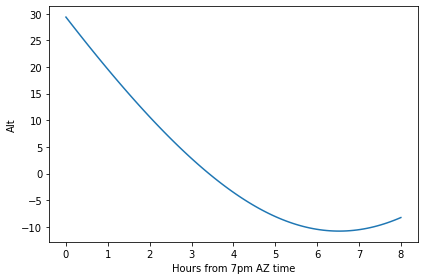

In [67]:
delta_hours = np.linspace(0, 8, 100)*u.hour
full_night_times = observing_time + delta_hours
full_night_aa_frames = AltAz(location=xinglong, obstime=full_night_times)

full_night_aa_coos = c.transform_to(full_night_aa_frames)

plt.plot(delta_hours, full_night_aa_coos.alt)
plt.xlabel('Hours from 7pm AZ time')
plt.ylabel('Alt')

plt.tight_layout()

# FITS File Handling

In [68]:
from astropy.io import fits

In [69]:
header = fits.getheader('data/hip.fits',1)

In [70]:
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  496 / length of dimension 1                          
NAXIS2  =               118218 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   78 / number of table fields                         
TTYPE1  = 'Catalog '                                                            
TFORM1  = '1A      '                                                            
TTYPE2  = 'HIP     '                                                            
TFORM2  = 'K       '                                                            
TNULL2  =               9999

In [71]:
data = fits.getdata('data/hip.fits',1)

In [72]:
data2 = Table.read('data/hip.fits')

In [73]:
data

FITS_rec([('H',      1, '', '00 00 00.22', '+01 05 20.4', 9.1 , 999999, 'H', 9.11850000e-04,   1.08901332, '',  3.54,  -5.2 ,  -1.88, 1.32, 0.74, 1.39, 1.36, 0.81, 0.32, -0.07, -0.11, -0.24,  0.09, -0.01,  0.1 , -0.01,  0.01, 0.34, 0,  0.74,      1,  9.643, 0.02 , 9.13 , 0.019, '',  0.482, 0.025, 'T',  0.55, 0.03, 'L', '', 9.2043, 0.002 , 0.017,  87, '', 9.17, 9.24, nan, '', '', '', '', '', 999999, 1, '', '', '', '', 999999, nan, nan, nan, nan, 'S', '', '', 224700, 'B+00 5077', '', '',  0.66, 'F5', 'S'),
          ('H',      2, '', '00 00 00.91', '-19 29 55.8', 9.27, 999999, 'G', 3.79737000e-03, -19.49883745, '+', 21.9 , 181.21,  -0.93, 1.28, 0.7 , 3.1 , 1.74, 0.92, 0.12, -0.14, -0.24, -0.29,  0.01,  0.21, -0.02, -0.19, -0.28, 0.14, 2,  1.45,      2, 10.519, 0.033, 9.378, 0.021, '',  0.999, 0.002, 'G',  1.04, 0.  , 'I', '', 9.4017, 0.0017, 0.015, 120, '', 9.37, 9.44, nan, 'C', '', '', '', '', 999999, 1, 'O', '', '', '', 999999, nan, nan, nan, nan, '', '', '', 224690, 'B-20 6688', '', '

In [75]:
data2

Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,Plx,pmRA,pmDE,e_RAdeg,e_DEdeg,e_Plx,e_pmRA,e_pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,pmRA:DE,pmRA:Plx,pmDE:RA,pmDE:DE,pmDE:Plx,pmDE:pmRA,F1,F2,---,BTmag,e_BTmag,VTmag,e_VTmag,m_BTmag,B-V,e_B-V,r_B-V,V-I,e_V-I,r_V-I,CombMag,Hpmag,e_Hpmag,Hpscat,o_Hpmag,m_Hpmag,Hpmax,HPmin,Period,HvarType,moreVar,morePhoto,CCDM,n_CCDM,Nsys,Ncomp,MultFlag,Source,Qual,m_HIP,theta,rho,e_rho,dHp,e_dHp,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
,,,,,mag,,,deg,deg,,mas,mas / yr,mas / yr,mas,mas,mas,mas / yr,mas / yr,,,,,,,,,,,0.01,,,mag,mag,mag,mag,,mag,mag,,mag,mag,,,mag,mag,mag,,,mag,mag,d,,,,,,,,,,,,deg,arcsec,arcsec,mag,mag,,,,,,,,mag,,
bytes1,int64,bytes1,bytes11,bytes11,float64,int64,bytes1,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,bytes1,float64,float64,bytes1,float64,float64,bytes1,bytes1,float64,float64,float64,int64,bytes1,float64,float64,float64,bytes1,bytes1,bytes1,bytes10,bytes1,int64,int64,bytes1,bytes1,bytes1,bytes2,int64,float64,float64,float64,float64,bytes1,bytes1,bytes1,int64,bytes10,bytes10,bytes10,float64,bytes12,bytes1
H,1,--,00 00 00.22,+01 05 20.4,9.1,--,H,0.00091185,1.08901332,--,3.54,-5.2,-1.88,1.32,0.74,1.39,1.36,0.81,0.32,-0.07,-0.11,-0.24,0.09,-0.01,0.1,-0.01,0.01,0.34,0,0.74,1,9.643,0.02,9.13,0.019,--,0.482,0.025,T,0.55,0.03,L,--,9.2043,0.002,0.017,87,--,9.17,9.24,--,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,S,--,--,224700,B+00 5077,--,--,0.66,F5,S
H,2,--,00 00 00.91,-19 29 55.8,9.27,--,G,0.00379737,-19.49883745,+,21.9,181.21,-0.93,1.28,0.7,3.1,1.74,0.92,0.12,-0.14,-0.24,-0.29,0.01,0.21,-0.02,-0.19,-0.28,0.14,2,1.45,2,10.519,0.033,9.378,0.021,--,0.999,0.002,G,1.04,0.0,I,--,9.4017,0.0017,0.015,120,--,9.37,9.44,--,C,--,--,--,--,--,1,O,--,--,--,--,--,--,--,--,--,--,--,224690,B-20 6688,--,--,1.04,K3V,4
H,3,--,00 00 01.20,+38 51 33.4,6.61,--,G,0.00500795,38.85928608,--,2.81,5.24,-2.91,0.53,0.4,0.63,0.57,0.47,0.06,0.09,0.04,0.43,-0.01,-0.06,0.03,0.24,0.07,0.21,0,-0.45,3,6.576,0.004,6.621,0.005,--,-0.019,0.004,G,0.0,0.0,H,--,6.6081,0.0007,0.008,127,--,6.6,6.62,--,C,--,--,00000+3852,I,1,1,--,--,--,--,--,--,--,--,--,S,--,--,224699,B+38 5108,--,--,0.0,B9,S
H,4,--,00 00 02.01,-51 53 36.8,8.06,--,H,0.0083817,-51.89354612,--,7.75,62.85,0.16,0.53,0.59,0.97,0.65,0.65,-0.22,-0.09,-0.03,0.24,0.2,0.08,0.18,0.08,-0.31,-0.18,0,-1.46,4,8.471,0.007,8.092,0.007,--,0.37,0.009,T,0.43,0.01,L,--,8.1498,0.0011,0.015,201,--,8.12,8.18,--,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,S,--,--,224707,--,--,P-52 12237,0.43,F0V,2
H,5,--,00 00 02.39,-40 35 28.4,8.55,--,H,0.00996534,-40.5912244,--,2.87,2.53,9.07,0.64,0.61,1.11,0.67,0.74,0.1,0.24,0.06,0.26,-0.1,0.2,-0.16,-0.3,-0.19,0.06,0,-1.24,5,9.693,0.014,8.656,0.01,--,0.902,0.013,T,0.9,0.01,L,--,8.7077,0.0018,0.019,161,--,8.68,8.74,--,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,--,--,--,224705,--,C-41 15372,P-41 9991,0.95,G8III,2
H,6,--,00 00 04.35,+03 56 47.4,12.31,--,G,0.01814144,3.94648893,--,18.8,226.29,-12.84,4.03,2.18,4.99,6.15,3.2,0.35,-0.01,0.03,-0.11,-0.02,0.47,-0.02,0.03,0.31,0.35,4,2.95,6,--,--,--,--,--,1.336,0.02,G,1.55,0.03,I,--,12.4488,0.0085,0.091,87,--,12.3,12.6,--,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,--,G,--,--,--,--,--,1.55,M0V:,S
H,7,--,00 00 05.41,+20 02 11.8,9.64,--,G,0.02254891,20.03660216,--,17.74,-208.12,-200.79,1.01,0.79,1.3,1.13,0.82,0.32,0.08,-0.02,-0.04,0.12,0.06,0.11,0.0,0.16,0.43,0,0.21,7,10.542,0.039,9.679,0.03,--,0.74,0.02,G,0.79,0.02,H,--,9.6795,0.0021,0.017,104,--,9.65,9.72,--,C,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,--,--,--,--,B+19 5185,--,--,0.79,G0,S
H,8,--,00 00 06.55,+25 53 11.3,9.05,3,H,0.0272916,25.88647445,--,5.17,19.09,-5.66,1.7,0.93,1.95,1.54,0.88,0.27,-0.66,-0.36,-0.38,-0.12,0.36,-0.21,-0.24,0.32,0.18,0,0.98,8,10.433,0.055,9.151,0.029,--,1.102,0.051,T,3.92,0.39,O,--,8.5522,0.1671,1.46,

In [76]:
header['comment'] = 'This is a comment'

In [77]:
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  496 / length of dimension 1                          
NAXIS2  =               118218 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   78 / number of table fields                         
TTYPE1  = 'Catalog '                                                            
TFORM1  = '1A      '                                                            
TTYPE2  = 'HIP     '                                                            
TFORM2  = 'K       '                                                            
TNULL2  =               9999

In [78]:
header['history'] = 'I updated this file 2020-12-09'

In [79]:
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  496 / length of dimension 1                          
NAXIS2  =               118218 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   78 / number of table fields                         
TTYPE1  = 'Catalog '                                                            
TFORM1  = '1A      '                                                            
TTYPE2  = 'HIP     '                                                            
TFORM2  = 'K       '                                                            
TNULL2  =               9999

In [80]:
header.keys()

<generator object Header.keys at 0x12b7144a0>

In [81]:
list(header.keys())

['XTENSION',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'PCOUNT',
 'GCOUNT',
 'TFIELDS',
 'TTYPE1',
 'TFORM1',
 'TTYPE2',
 'TFORM2',
 'TNULL2',
 'TTYPE3',
 'TFORM3',
 'TTYPE4',
 'TFORM4',
 'TTYPE5',
 'TFORM5',
 'TTYPE6',
 'TFORM6',
 'TUNIT6',
 'TTYPE7',
 'TFORM7',
 'TNULL7',
 'TTYPE8',
 'TFORM8',
 'TTYPE9',
 'TFORM9',
 'TUNIT9',
 'TTYPE10',
 'TFORM10',
 'TUNIT10',
 'TTYPE11',
 'TFORM11',
 'TTYPE12',
 'TFORM12',
 'TUNIT12',
 'TTYPE13',
 'TFORM13',
 'TUNIT13',
 'TTYPE14',
 'TFORM14',
 'TUNIT14',
 'TTYPE15',
 'TFORM15',
 'TUNIT15',
 'TTYPE16',
 'TFORM16',
 'TUNIT16',
 'TTYPE17',
 'TFORM17',
 'TUNIT17',
 'TTYPE18',
 'TFORM18',
 'TUNIT18',
 'TTYPE19',
 'TFORM19',
 'TUNIT19',
 'TTYPE20',
 'TFORM20',
 'TTYPE21',
 'TFORM21',
 'TTYPE22',
 'TFORM22',
 'TTYPE23',
 'TFORM23',
 'TTYPE24',
 'TFORM24',
 'TTYPE25',
 'TFORM25',
 'TTYPE26',
 'TFORM26',
 'TTYPE27',
 'TFORM27',
 'TTYPE28',
 'TFORM28',
 'TTYPE29',
 'TFORM29',
 'TTYPE30',
 'TFORM30',
 'TUNIT30',
 'TNULL30',
 'TTYPE31',
 'TFORM31',
 'TTYPE3

## Create table fits

In [82]:
data3 = data2[data2['Vmag'] < 3]

In [86]:
c1 = fits.Column(name='hip', array=data3['HIP'], format='K')
c2 = fits.Column(name='ra', array=data3['RAdeg'], format='D', unit='deg')
c3 = fits.Column(name='dec', array=data3['DEdeg'], format='D', unit='deg')
c4 = fits.Column(name='vmag', array=data3['Vmag'], format='D', unit='mag')
ht = fits.BinTableHDU.from_columns([c1, c2, c3,c4])

In [87]:
ht

In [88]:
ht.writeto('data/bright-hip.fits')

In [90]:
!fitsheader-3.8 data/bright-hip.fits

# HDU 0 in data/bright-hip.fits:
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

# HDU 1 in data/bright-hip.fits:
XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                  172 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of

# 显示图像

In [91]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

In [96]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /Users/yiqianqian/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [97]:
image_data = hdu_list[0].data

In [98]:
print(f'image_data type is {type(image_data)}')
print(f'dimesion of image_data is {image_data.shape}')

image_data type is <class 'numpy.ndarray'>
dimesion of image_data is (893, 891)


In [99]:
hdu_list.close()

In [100]:
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


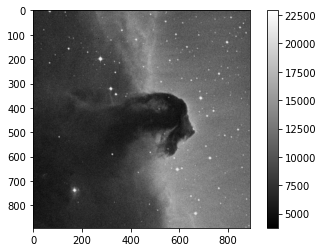

In [101]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [102]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046
